변수들의 상관관계 히트맵

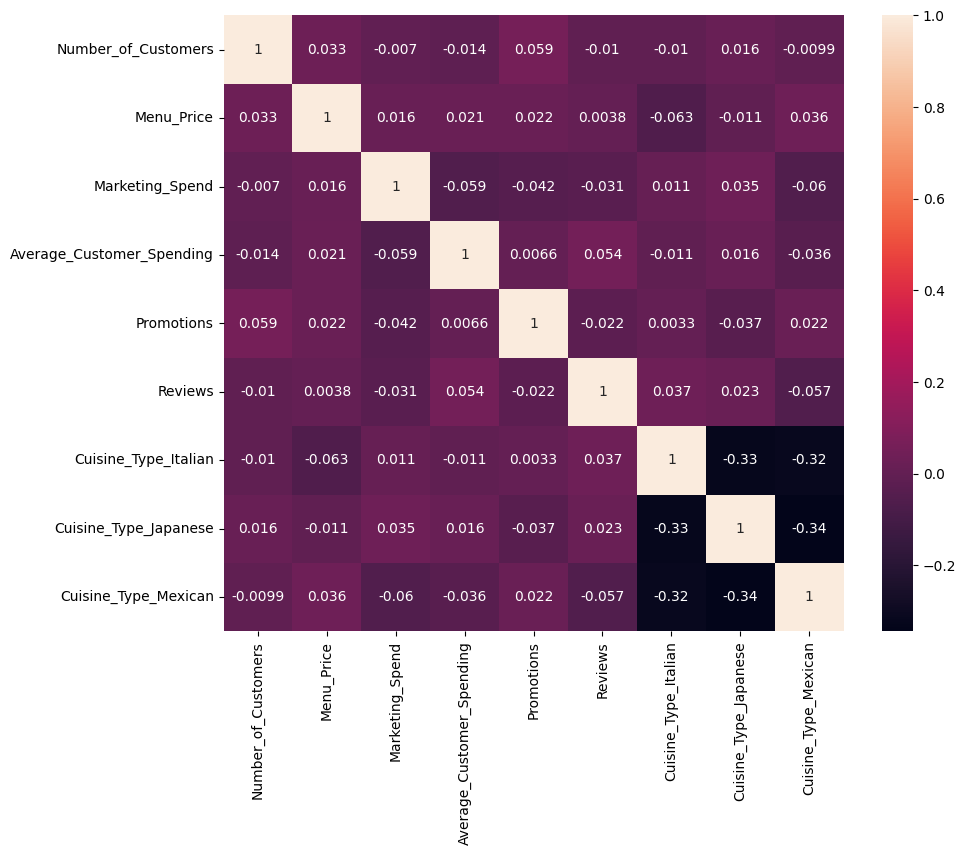

In [5]:
from typing_extensions import dataclass_transform
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt

raw_data = pd.read_csv('Restaurant_revenue (1).csv')
#데이터 전처리(범주형 변수 처리)
data = pd.get_dummies(raw_data, columns=['Cuisine_Type'], drop_first=True)

X = data.drop(['Monthly_Revenue'], axis=1)
y = data['Monthly_Revenue']

#변수 상관관계
corr = X.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True)
plt.show()

데이터셋 변수들의 분포도 시각화

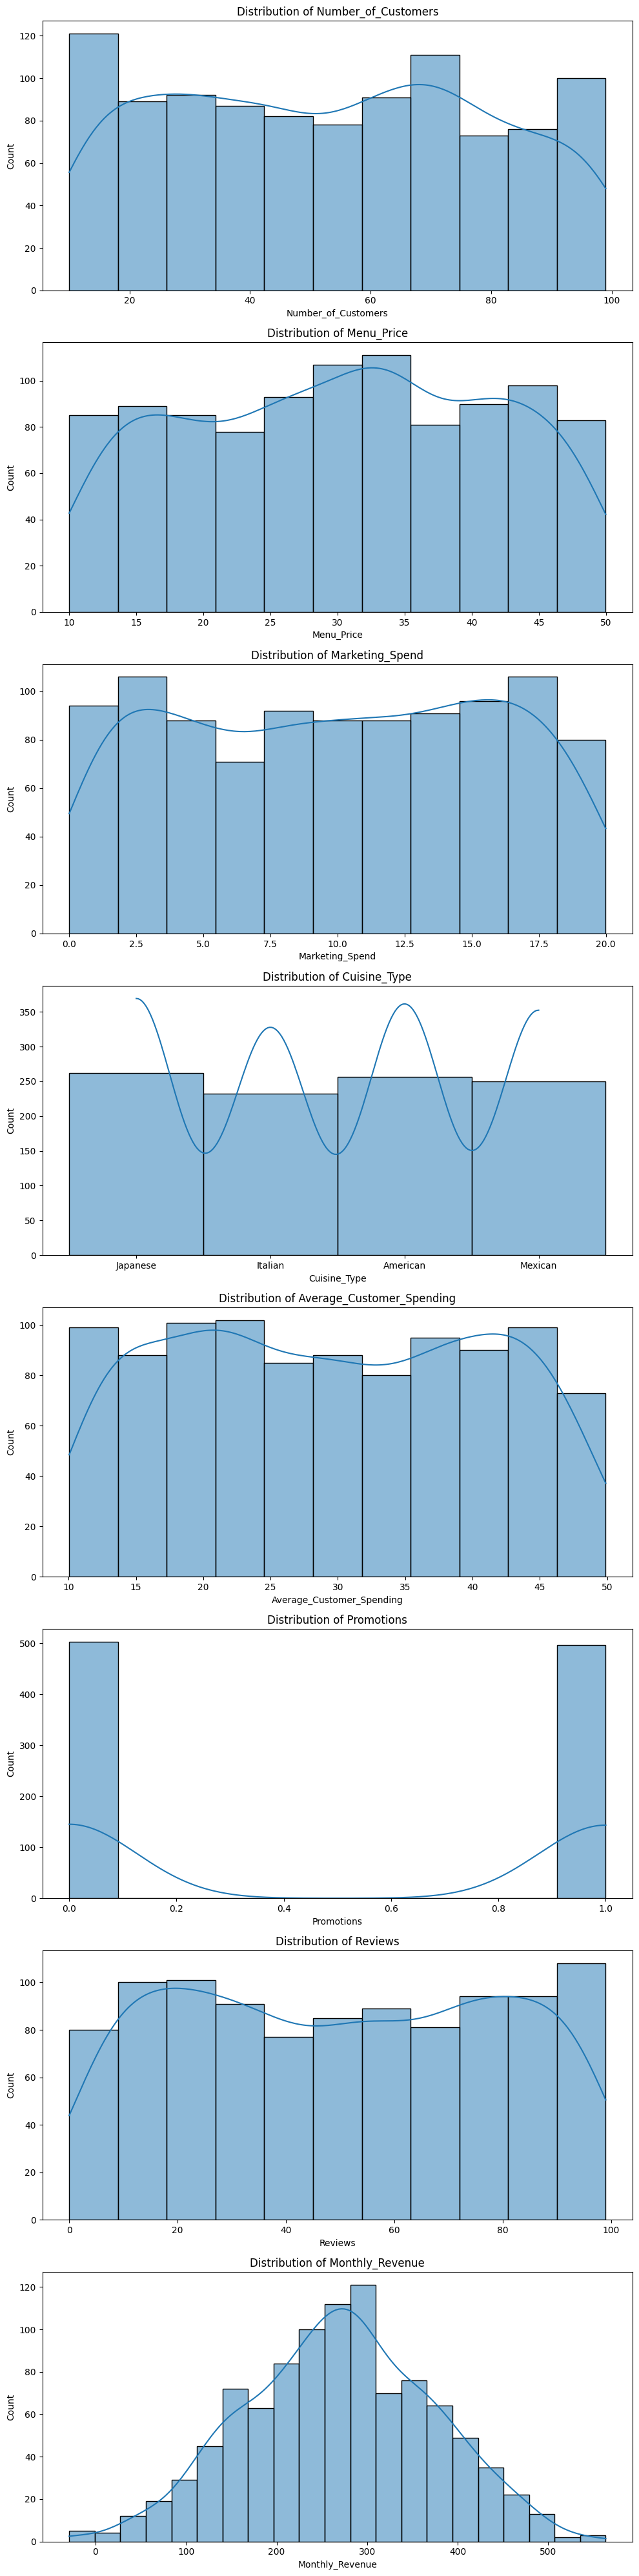

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(len(raw_data.columns), 1, figsize=(10, 5 * len(raw_data.columns)))

# Iterate over each column and create a distplot
for i, column in enumerate(raw_data.columns):
    sns.histplot(raw_data[column], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

OLS 선형회귀 모델 훈련

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

#테스트셋에 적용
y_pred = model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'RMSE: {rmse}')
pd.DataFrame(zip(X.columns, model.coef_))


RMSE: 59.66941289281966


,0,1
0,Number_of_Customers,2.909034
1,Menu_Price,2.072418
2,Marketing_Spend,5.019668
3,Average_Customer_Spending,-0.179445
4,Promotions,-4.487719
5,Reviews,-0.015492
6,Cuisine_Type_Italian,-1.307481
7,Cuisine_Type_Japanese,0.451322
8,Cuisine_Type_Mexican,3.053016


RidgeCV를 이용하여 최적의 알파값을 구한 모델 도출

In [8]:
from sklearn.linear_model import RidgeCV
import numpy as np

ridge_cv = RidgeCV()

alphas = np.arange(100,5000,5)

ridge_cv = RidgeCV(alphas=alphas, cv=5)
ridge_cv.fit(X_train, y_train)
y_pred_ridge = ridge_cv.predict(X_test)
rmse_ridge = mean_squared_error(y_test, y_pred_ridge, squared=False)

print('최적알파: ', ridge_cv.alpha_)


최적알파:  885


알파값을 대입하여 모델 훈련

In [9]:
from sklearn.linear_model import Ridge
ridge_regCV = Ridge(alpha=885)

ridge_regCV.fit(X_train, y_train)

y_pred_ridgeCV = ridge_regCV.predict(X_test)
rmse_ridgeCV = mean_squared_error(y_test, y_pred_ridgeCV, squared=False)
print(f'rmse : {rmse_ridgeCV}')

pd.DataFrame(zip(X.columns, ridge_regCV.coef_))



rmse : 59.68514544952543


,0,1
0,Number_of_Customers,2.900331
1,Menu_Price,2.061242
2,Marketing_Spend,4.872848
3,Average_Customer_Spending,-0.184881
4,Promotions,-0.836766
5,Reviews,-0.016594
6,Cuisine_Type_Italian,-0.329371
7,Cuisine_Type_Japanese,0.027727
8,Cuisine_Type_Mexican,0.418447


반복문을 통한 최적의 RSME 값을 도출하는 Ridge 모델 도출

In [10]:
for i in range(-2,10):
  ridge_reg = Ridge(alpha=10**i)
  ridge_reg.fit(X_train, y_train)
  y_pred_ridge = ridge_reg.predict(X_test)
  rmse_ridge = mean_squared_error(y_test, y_pred_ridge, squared=False)
  print(f'{10**i} rmse : {rmse_ridge}')



0.01 rmse : 59.66941783894396
0.1 rmse : 59.669462303955115
1 rmse : 59.669902075321126
10 rmse : 59.67388078594215
100 rmse : 59.69578685912918
1000 rmse : 59.678179121109245
10000 rmse : 59.59784120577387
100000 rmse : 64.62221359956597
1000000 rmse : 85.34603195285399
10000000 rmse : 102.04293128438371
100000000 rmse : 104.82229876979822
1000000000 rmse : 105.11806528752304


In [29]:
least_alpha = 0
stored_rmse = 106

for i in range(1000,10000):
  ridge_reg = Ridge(alpha=i)
  ridge_reg.fit(X_train, y_train)
  y_pred_ridge = ridge_reg.predict(X_test)
  rmse_ridge = mean_squared_error(y_test, y_pred_ridge, squared=False)
  if stored_rmse > rmse_ridge:
    least_alpha=i
    stored_rmse=rmse_ridge

print(f'{least_alpha} rmse : {stored_rmse}')

5854 rmse : 59.522506139082616


In [12]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=5854)

ridge_reg.fit(X_train, y_train)

y_pred_ridge = ridge_reg.predict(X_test)
rmse_ridge = mean_squared_error(y_test, y_pred_ridge, squared=False)
print(f'rmse : {rmse_ridge}')

pd.DataFrame(zip(X.columns, ridge_reg.coef_))

rmse : 59.522506139082616


,0,1
0,Number_of_Customers,2.873880
1,Menu_Price,1.976846
2,Marketing_Spend,4.143405
3,Average_Customer_Spending,-0.179355
4,Promotions,-0.165406
5,Reviews,-0.021374
6,Cuisine_Type_Italian,-0.064711
7,Cuisine_Type_Japanese,0.018921
8,Cuisine_Type_Mexican,0.061038


In [19]:
from sklearn.linear_model import LassoCV
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.exceptions import ConvergenceWarning
import warnings

# Suppress convergence warnings for demonstration purposes
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)

alphas = np.arange(0.01, 100, 0.01)

lasso_cv = LassoCV(alphas=alphas, cv=5, max_iter=10000)
lasso_cv.fit(X_train, y_train.ravel())

y_pred_lasso = lasso_cv.predict(X_test)
print("최적알파:", lasso_cv.alpha_)


최적알파: 1.75


LassoCV를 이용하여 최적의 알파값을 구한 모델 도출

In [20]:
from sklearn.linear_model import Lasso
lasso_regCV = Lasso(alpha=1.75)

lasso_regCV.fit(X_train, y_train)

y_pred_lassoCV = lasso_regCV.predict(X_test)
rmse_lassoCV = mean_squared_error(y_test, y_pred_lassoCV, squared=False)
print(f'rmse : {rmse_lassoCV}')

pd.DataFrame(zip(X.columns, lasso_regCV.coef_))


rmse : 59.76962983384031


,0,1
0,Number_of_Customers,2.901598
1,Menu_Price,2.065026
2,Marketing_Spend,4.983819
3,Average_Customer_Spending,-0.174158
4,Promotions,-0.000000
5,Reviews,-0.013896
6,Cuisine_Type_Italian,-0.000000
7,Cuisine_Type_Japanese,0.000000
8,Cuisine_Type_Mexican,0.000000


반복문을 통한 최적의 RSME 값을 도출하는 Lasso 모델 도출

In [21]:
for i in range(-2,10):
  lasso = Lasso(alpha=10**i, max_iter=10000)
  lasso.fit(X_train, y_train)
  pred=lasso.predict(X_test)
  rmse=mean_squared_error(y_test, pred, squared=False)
  print(f'{10**i} rsme : {rmse}')

0.01 rsme : 59.67054992303457
0.1 rsme : 59.67934664951626
1 rsme : 59.772250701255494
10 rsme : 59.65871593662542
100 rsme : 61.568820573684285
1000 rsme : 79.88560280719422
10000 rsme : 105.15114024440459
100000 rsme : 105.15114024440459
1000000 rsme : 105.15114024440459
10000000 rsme : 105.15114024440459
100000000 rsme : 105.15114024440459
1000000000 rsme : 105.15114024440459


In [28]:
least_alpha1 = 0
stored_rmse1 = 106

for i in range(100):
  lasso_model = Lasso(alpha=i, max_iter=10000)
  lasso_model.fit(X_train, y_train)
  y_lasso = lasso_model.predict(X_test)
  rmse = mean_squared_error(y_test, y_lasso, squared=False)
  if stored_rmse1 > rmse:
    least_alpha1=i
    stored_rmse1=rmse

print(f'{least_alpha1} rsme : {stored_rmse1}')

<ipython-input-28-137309365e75>:6: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso_model.fit(X_train, y_train)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(


23 rsme : 59.59919778765221


In [ ]:
lasso_model = Lasso(alpha=23, max_iter=10000)
lasso_model.fit(X_train, y_train)


y_pred_lasso = lasso_model.predict(X_test)
rmse_lasso = mean_squared_error(y_test, y_pred_lasso, squared=False)
print(f'rmse : {rmse_lasso}')

pd.DataFrame(zip(X.columns, lasso_model.coef_))

rmse : 59.59919778765221


,0,1
0,Number_of_Customers,2.870962
1,Menu_Price,1.906755
2,Marketing_Spend,4.369580
3,Average_Customer_Spending,-0.016299
4,Promotions,-0.000000
5,Reviews,-0.000000
6,Cuisine_Type_Italian,-0.000000
7,Cuisine_Type_Japanese,0.000000
8,Cuisine_Type_Mexican,0.000000


In [ ]:
m1 = pd.DataFrame(zip(X.columns, model.coef_))

m2 = pd.DataFrame(zip(X.columns, ridge_regCV.coef_))

m3 = pd.DataFrame(zip(X.columns, ridge_reg.coef_))

m4 = pd.DataFrame(zip(X.columns, lasso_regCV.coef_))

m5 = pd.DataFrame(zip(X.columns, lasso_model.coef_))

#편의상 구분하기 쉽게 모델이름 변경
m11=model
m12=ridge_regCV
m13=ridge_reg
m14=lasso_regCV
m15=lasso_model

print("OLS 회귀")
print(m1)
r2 = m11.score(X_test, y_test)
print(f'R_Squared : {r2}')
y_pred = model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'RMSE: {rmse}')

print("\nRidgeCV 회귀")
print(m2)
r2 = m12.score(X_test, y_test)
print(f'R_Squared : {r2}')
y_pred_ridgeCV = ridge_regCV.predict(X_test)
rmse_ridgeCV = mean_squared_error(y_test, y_pred_ridgeCV, squared=False)
print(f'rmse : {rmse_ridgeCV}')

print("\nRidge 회귀")
print(m3)
r2 = m13.score(X_test, y_test)
print(f'R_Squared : {r2}')
y_pred_ridge = ridge_reg.predict(X_test)
rmse_ridge = mean_squared_error(y_test, y_pred_ridge, squared=False)
print(f'rmse : {rmse_ridge}')

print("\nLassoCV 회귀")
print(m4)
r2 = m14.score(X_test, y_test)
print(f'R_Squared : {r2}')
y_pred_lassoCV = lasso_regCV.predict(X_test)
rmse_lassoCV = mean_squared_error(y_test, y_pred_lassoCV, squared=False)
print(f'rmse : {rmse_lassoCV}')

print("\nLasso 회귀")
print(m5)
r2 = m15.score(X_test, y_test)
print(f'R_Squared : {r2}')
y_pred_lasso = lasso_model.predict(X_test)
rmse_lasso = mean_squared_error(y_test, y_pred_lasso, squared=False)
print(f'rmse : {rmse_lasso}')

OLS 회귀
                           0         1
0        Number_of_Customers  2.909034
1                 Menu_Price  2.072418
2            Marketing_Spend  5.019668
3  Average_Customer_Spending -0.179445
4                 Promotions -4.487719
5                    Reviews -0.015492
6       Cuisine_Type_Italian -1.307481
7      Cuisine_Type_Japanese  0.451322
8       Cuisine_Type_Mexican  3.053016
R_Squared : 0.6740626407300359
RMSE: 59.66941289281966

RidgeCV 회귀
                           0         1
0        Number_of_Customers  2.900331
1                 Menu_Price  2.061242
2            Marketing_Spend  4.872848
3  Average_Customer_Spending -0.184881
4                 Promotions -0.836766
5                    Reviews -0.016594
6       Cuisine_Type_Italian -0.329371
7      Cuisine_Type_Japanese  0.027727
8       Cuisine_Type_Mexican  0.418447
R_Squared : 0.6738907434799943
rmse : 59.68514544952543

Ridge 회귀
                           0         1
0        Number_of_Customers  2.873880
1 

과적합 테스트

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import math


m15.fit(X_train, y_train)
y_train_pred = m15.predict(X_train)
y_test_pred = m15.predict(X_test)


train_mse = mean_squared_error(y_train, y_train_pred)
val_mse = mean_squared_error(y_test, y_test_pred)

train_r2 = r2_score(y_train, y_train_pred)
val_r2 = r2_score(y_test, y_test_pred)

print(f"Training RMSE: {math.sqrt(train_mse)}")
print(f"Validation RMSE: {math.sqrt(val_mse)}")

print(f"Training R^2: {train_r2}")
print(f"Validation R^2: {val_r2}")
# 트레이닝 셋과 검증 셋의 RMSE와 결정계수가 유사함을 알 수 있다.

Training RMSE: 58.267681453424316
Validation RMSE: 59.59919778765221
Training R^2: 0.6840133999571391
Validation R^2: 0.674829273402601


논문 데이터셋 회귀